<h1 align="center">Introduction to Machine Learning</h1>
<h4 align="center">Instructor : Dr. Shamsollahi</h4>
<h4 align="center">Electerical Engineering department of Sharif University of Technology, Spring 2024</h4>
<h4 align="center">Computer Assignment 3</h4>
<h4 align="center">Arman Yazdani 400102255</h4>

## Section 1.1
# PCA and LDA analysis on MNIST dataset

در درس با آنالیز مولفه های اصلی آشنا شدید. در این تمرین قصد داریم از ابتدا این روش را روی دیتاست داده شده پیاده سازی کنیم و نتایج این روش را مشاهده کنیم

کتابخانه های مورد نیاز را در بخش زیر ایمپورت کنید


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

را لود کنید MNIST حال دیتاست

پیش پردازش های لازم روی دیتا مانند نرمالایز کردن را انجام دهید.
توجه کنید که سمپل های لود شده به صورت 28*28  می باشند و باید آن را به صورت بردار 784 تایی تبدیل کنید

In [ ]:
#load the dataset and fill nan value with 0
# TODO
from sklearn.datasets import fetch_openml

X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

X = X / 255.0

X = np.nan_to_num(X, nan=0)


c:\Users\HAMAHANG\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


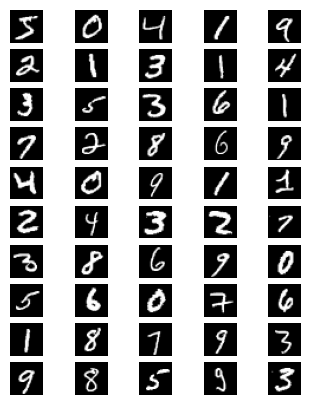

In [ ]:
# show 50 first of this images
# TODO
X = X[:10000]
y = y[:10000]
fig, axes = plt.subplots(10, 5, figsize=(5, 5))
axes = axes.ravel()

for i in np.arange(0, 50):
    axes[i].imshow(X[i].reshape(28, 28), cmap='gray')
    axes[i].axis('off')
plt.subplots_adjust(wspace=-0.5)
plt.show()

In [ ]:
# normalize the dataset to [0 1]
# TODO
data_min = np.min(X)
data_max = np.max(X)
X_normalized = (X - data_min) / (data_max - data_min)

در این قسمت ابتدا تابع کواریانس داده را بدست آورید و سپس مقادیر ویژه و بردار ویژه های آن را استخراج کنید

In [ ]:
# calculate the covariance matrix and the eigenvalue and eigenvectors of the covariance matrix.
# TODO
import numpy as np

cov_matrix = np.cov(X_normalized.T)

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

print("Covariance Matrix:")
print(cov_matrix)

print("\nEigenvalues:")
print(eigenvalues)

print("\nEigenvectors:")
print(eigenvectors)


Covariance Matrix:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Eigenvalues:
[ 5.38127233e+00+0.00000000e+00j  3.80668065e+00+0.00000000e+00j
  3.22387756e+00+0.00000000e+00j  2.85714925e+00+0.00000000e+00j
  2.51976155e+00+0.00000000e+00j  2.32849644e+00+0.00000000e+00j
  1.73189326e+00+0.00000000e+00j  1.54431774e+00+0.00000000e+00j
  1.46913317e+00+0.00000000e+00j  1.21729792e+00+0.00000000e+00j
  1.12348173e+00+0.00000000e+00j  1.08383213e+00+0.00000000e+00j
  8.90010332e-01+0.00000000e+00j  8.87280717e-01+0.00000000e+00j
  8.52945381e-01+0.00000000e+00j  8.11707969e-01+0.00000000e+00j
  6.79465194e-01+0.00000000e+00j  6.66711791e-01+0.00000000e+00j
  6.11483589e-01+0.00000000e+00j  5.94965780e-01+0.00000000e+00j
  5.45463895e-01+0.00000000e+00j  5.31699965e-01+0.00000000e+00j
  4.98286479e-01+0.00000000e+00j  4.87191347e-01+0.00000000e+00j
  4.51025095e-01+0.00000000e+00

 حال تعدادی از مولفه های اصلی را استخراج کنید که بخش قابل قبولی از واریانس داده ها را شامل شده باشند

In [ ]:
explained_variance = 0.75 # you can change this variable to get more component of datasets.
# calculate the total variance from eigenvalues and find the first k component that contains the eplained_variance of the total variance.
# TODO
total_variance = np.sum(eigenvalues)

print("Total Variance:", total_variance)

cumulative_variance = np.cumsum(eigenvalues) / total_variance
k = np.where(cumulative_variance >= explained_variance)[0][0] + 1

print(f"The first {k} components contain 75% of the total variance.")

# Calculate the compression ratio
original_size = X.shape[1]
compressed_size = k
compression_ratio = 1 - (compressed_size / original_size)

print(f"Compression ratio: {compression_ratio:.2f}")

Total Variance: (52.75743279668662+0j)
The first 33 components contain 75% of the total variance.
Compression ratio: 0.96


حال در این بخش دیتاهای موجود را روی این مولفه ها تصویر کنید. عملیات کاهش بعد را انجام دهید و سپس ابعاد را به اندازه تصاویر اصلی برگردانید و  تصویر یکی از سمپل ها را برای هر دو حالت قبل از کاهش بعد روی مولفه ها و بعد از آن رسم کنید

C:\Users\HAMAHANG\AppData\Local\Temp\ipykernel_5344\3978865347.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  top_eigenvectors = eigenvectors[:, :k].astype(float)


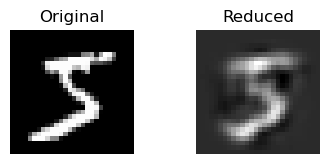

In [ ]:
# Project Images into Reduced Dimensionality Eigenbasis
# And Reproject Images to Standard Basis for plotting the reduced component image
# select one sample and reshape it to a 28 by 28 matrix and plot them as image

# TODO
top_eigenvectors = eigenvectors[:, :k].astype(float)

# Project the data into the reduced dimensionality eigenbasis
X_reduced = X_normalized.dot(top_eigenvectors.astype(float))

# Reproject the data back to the standard basis
X_reconstructed = X_reduced.dot(top_eigenvectors.T)

# Select a sample image
sample_index = 0
sample_image = X_reconstructed[sample_index].reshape(28, 28)

# Plot the sample image

fig, axes = plt.subplots(1, 2, figsize=(4, 4))
axes = axes.ravel()
axes[0].imshow(X[0].reshape(28, 28), cmap='gray')
axes[0].axis('off')
axes[0].set_title("Original")
axes[1].imshow(sample_image, cmap='gray')
axes[1].axis('off')
axes[1].set_title("Reduced")
plt.subplots_adjust(wspace=0.5)
plt.show()

حال در این قسمت از تابع آماده پایتون برای کاهش بعد با کرنل های مختلف استفاده کنید و پس از اعمال کاهش بعد، نمودار داده ها را برای هر کرنل استفاده شده رسم کنید و چند نمونه از داده ها را نمایش دهید.

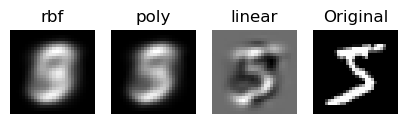

In [ ]:
# use python kernel PCA function
# Kernels : RBF - Polynomial - Linear
# plot new dataset after applying kernel pca for each kernels
# show some samples
# TODO
from sklearn.decomposition import KernelPCA

# Apply Kernel PCA with different kernels
kernel_types = ['rbf', 'poly', 'linear']
n_components = 33  # Reduce to 33 dimensions
fig, axes = plt.subplots(1, 4, figsize=(5, 5))
axes = axes.ravel()

for i, kernel in enumerate(kernel_types):
    kpca = KernelPCA(n_components=n_components, kernel=kernel,fit_inverse_transform = True)
    X_kpca = kpca.fit_transform(X)

    # Show one sample image
    sample_index = 0
    sample_image = X[sample_index].reshape(28, 28)
    sample_kpca = kpca.inverse_transform([X_kpca[sample_index]])
    sample_kpca_image = sample_kpca.reshape(28, 28)
    axes[i].imshow(sample_kpca_image, cmap='gray')
    axes[i].set_title(f"{kernel}")
    axes[i].axis('off')
axes[3].imshow(X[0].reshape(28, 28), cmap='gray')
axes[3].axis('off')
axes[3].set_title("Original")
plt.show()



 در این قسمت کاهش بعد را با استفاده از

LDA

انجام دهید و پس از اعمال کاهش بعد ، نمودار داده ها را رسم کنید و چند نمونه از داده ها را نمایش دهید

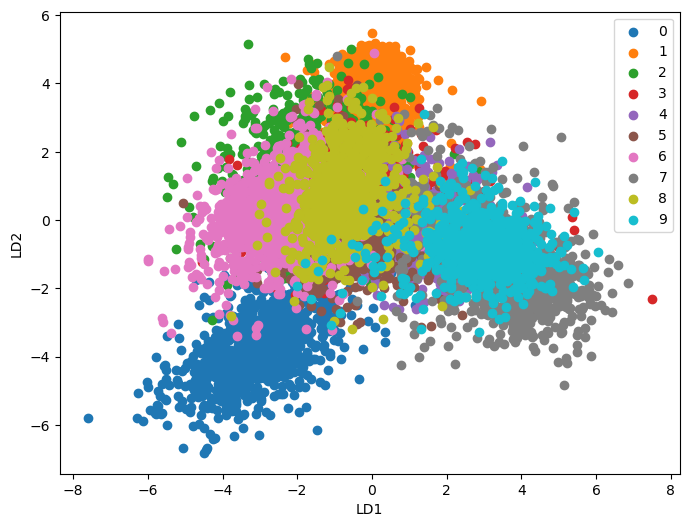

First 10 samples from the new dataset:
0 : [-1.2224355  -0.66551979 -1.49228127 -0.01205511 -1.21315681 -3.41061765
  1.01328898  0.69328727  0.55710471]
1 : [-2.82901915 -4.46858084 -2.45769231 -0.318333    2.74497182  0.72396654
  0.53652138 -0.84335666  0.27786843]
2 : [ 2.16069078  0.14179102  1.0773921   0.0107357  -1.16966246  2.45446291
  1.67189538  3.14571927 -2.99364923]
3 : [-0.12925328  3.97037764 -1.12981264  0.39945853  2.21335555  0.24023184
  0.29818472  0.84356736 -0.29235524]
4 : [ 3.0847419  -1.14209167  0.80114401  0.04555964  1.41347444  1.41408687
 -0.80033706 -1.85779159  2.1058561 ]
5 : [-0.23118136  0.21344535 -0.42721598 -2.45466666 -1.67720654  2.06459576
 -1.21392484  0.17387276  3.18150989]
6 : [ 0.61550402  4.81557522 -1.50863929  0.09512401  1.86046061  0.30550532
  1.48656185 -0.07893349  0.48538995]
7 : [-0.72445102  0.05932831 -2.2636042   0.27596491 -2.7618769   0.01129923
  0.61899131 -1.94994889 -1.20741754]
8 : [ 0.12033731  4.08417283 -1.44161711 

In [ ]:
# use python LDA function
# plot new dataset after applying LDA
# show some samples
# TODO
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=9)
X_lda = lda.fit_transform(X, y)

# Plotting the new dataset
plt.figure(figsize=(8, 6))
for label in np.unique(y):
    plt.scatter(X_lda[y == label, 0], X_lda[y == label, 1], label=label)
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

# Showing one sample
print("First 10 samples from the new dataset:")
for i in np.arange(0, 10):
    print(f"{i} : {X_lda[i]}")



با استفاده از یک طبقه بند به انتخاب خودتان، دیتای بدون کاهش بعد و دیتاست حاصل از هر یک از روش های بالا را طبقه بندی کنید و نتایج را روی دیتاست تست بدست آورید.

In [ ]:
# calculate accuracy of original data , projected data from pca , projected data from each kernel pca and projected data from LDA on one ml model(choose on your own)
# TODO
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

images = X[:2000]
labels = y[:2000]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Logistic Regression
lr = LogisticRegression()

# Original Data
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("Accuracy on Original Data: ", accuracy_score(y_test, y_pred))

# PCA
pca = PCA(n_components=33)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
lr.fit(X_train_pca, y_train)
y_pred_pca = lr.predict(X_test_pca)
print("Accuracy on Manual PCA : ", accuracy_score(y_test, y_pred_pca))

# Kernel PCA with RBF kernel
kpca_rbf = KernelPCA(n_components=33, kernel='rbf')
X_train_kpca_rbf = kpca_rbf.fit_transform(X_train)
X_test_kpca_rbf = kpca_rbf.transform(X_test)
lr.fit(X_train_kpca_rbf, y_train)
y_pred_kpca_rbf = lr.predict(X_test_kpca_rbf)
print("Accuracy on RBF Kernel PCA projected Data: ", accuracy_score(y_test, y_pred_kpca_rbf))

# Kernel PCA with Polynomial kernel
kpca_poly = KernelPCA(n_components=33, kernel='poly', degree=3)  # degree is a parameter for the polynomial kernel
X_train_kpca_poly = kpca_poly.fit_transform(X_train)
X_test_kpca_poly = kpca_poly.transform(X_test)
lr.fit(X_train_kpca_poly, y_train)
y_pred_kpca_poly = lr.predict(X_test_kpca_poly)
print("Accuracy on Polynomial Kernel PCA projected Data: ", accuracy_score(y_test, y_pred_kpca_poly))

# Kernel PCA with Linear kernel
kpca_linear = KernelPCA(n_components=33, kernel='linear')
X_train_kpca_linear = kpca_linear.fit_transform(X_train)
X_test_kpca_linear = kpca_linear.transform(X_test)
lr.fit(X_train_kpca_linear, y_train)
y_pred_kpca_linear = lr.predict(X_test_kpca_linear)
print("Accuracy on Linear Kernel PCA projected Data: ", accuracy_score(y_test, y_pred_kpca_linear))


# LDA
lda = LDA(n_components=9)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)
lr.fit(X_train_lda, y_train)
y_pred_lda = lr.predict(X_test_lda)
print("Accuracy on LDA projected Data: ", accuracy_score(y_test, y_pred_lda))


c:\Users\HAMAHANG\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy on Original Data:  0.885
Accuracy on Manual PCA :  0.865
Accuracy on RBF Kernel PCA projected Data:  0.8175
Accuracy on Polynomial Kernel PCA projected Data:  0.825
Accuracy on Linear Kernel PCA projected Data:  0.865
Accuracy on LDA projected Data:  0.755


دقت های بدست آمده را با یکدیگر مقایسه کنید.کاهش بعد تاثیر مثبت بر دقت طبقه بندی داشته است یا منفی؟ بحث کنید

1. **Accuracy-Dimensionality Trade-off**: The manual PCA and linear Kernel PCA achieved the highest accuracy, while reducing the dimensionality from 784 to 33. This demonstrates a favorable trade-off between accuracy and dimensionality, as the model performance was only slightly reduced (from 0.885 to 0.865) while the dimensionality was significantly reduced.

2. **Non-linear Kernel PCA**: The non-linear Kernel PCA techniques (RBF and Polynomial) had lower accuracies compared to the linear PCA and Kernel PCA, despite having the same dimensionality (33). This suggests that the non-linear projections may not have been as effective at preserving the relevant features for the logistic regression model as the linear techniques.

3. **Limitations of LDA**: The LDA-based dimensionality reduction had the lowest accuracy, even with a much smaller dimensionality (9). This indicates that the LDA projection may not have been well-suited for the logistic regression task, as it is primarily designed for classification problems rather than general regression tasks.

In conclusion, the manual PCA and linear Kernel PCA offer the best trade-off between accuracy and dimensionality reduction for the logistic regression model on the MNIST dataset. The non-linear Kernel PCA and LDA techniques did not perform as well in this case, highlighting the importance of considering the characteristics of the data and the target machine learning task when choosing a dimensionality reduction method.



## Section 1.2
# Implement an Auto-encoder network


برای پیاده سازی می توانید از کتابخانه های آماده استفاده کنید و ابعاد شبکه نیز به انتخاب خودتان است اما ابعاد لایه  ویژگی را 2 در نظر بگیرید.شبکه را با داده آموزش ، آموزش دهید و عملکرد ان را از نظر از دست دادن بازسازی  ارزیابی کنید. از بخش انکودر آموزش دیده برای به دست اوردن نمایش ابعادی کاهش یافته مجموعه داده استفاده کنید. در نظر داشته باشید با افزایش تعداد ایپاک ها کیفیت تصاویر خروجی بهتر خواهند شد.

دقت شود برای پیاده سازی شبکه از

MLP

استفاده کنید


In [1]:
# TODO
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from keras import layers, losses
from keras.datasets import mnist
from keras.models import Model


In [3]:
# Loading the MNIST dataset and extracting training and testing data
(x_train, _), (x_test, _) = mnist.load_data()

# Normalizing pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [4]:
# Definition of the Autoencoder model as a subclass of the TensorFlow Model class

class Autoencoder(Model):
	def __init__(self,latent_dimensions , data_shape):
		super(Autoencoder, self).__init__()
		self.latent_dimensions = latent_dimensions
		self.data_shape = data_shape

		# Encoder architecture using a Sequential model
		self.encoder = tf.keras.Sequential([
			layers.Flatten(),
			layers.Dense(latent_dimensions, activation='relu'),
		])

		# Decoder architecture using another Sequential model
		self.decoder = tf.keras.Sequential([
			layers.Dense(tf.math.reduce_prod(data_shape), activation='sigmoid'),
			layers.Reshape(data_shape)
		])

	# Forward pass method defining the encoding and decoding steps
	def call(self, input_data):
		encoded_data = self.encoder(input_data)
		decoded_data = self.decoder(encoded_data)
		return decoded_data


Training with 2 epochs:
Epoch 1/2
1875/1875 [==============================] - 10s 4ms/step - loss: 0.0693 - val_loss: 0.0600
Epoch 2/2
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0590 - val_loss: 0.0580
Training with 4 epochs:
Epoch 1/4
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0576 - val_loss: 0.0572
Epoch 2/4
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0570 - val_loss: 0.0568
Epoch 3/4
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0566 - val_loss: 0.0564
Epoch 4/4
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0564 - val_loss: 0.0562
Training with 8 epochs:
Epoch 1/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0562 - val_loss: 0.0560
Epoch 2/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0560 - val_loss: 0.0559
Epoch 3/8
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0559 - val_loss: 0.0559
Epoch 4/8
1875/187

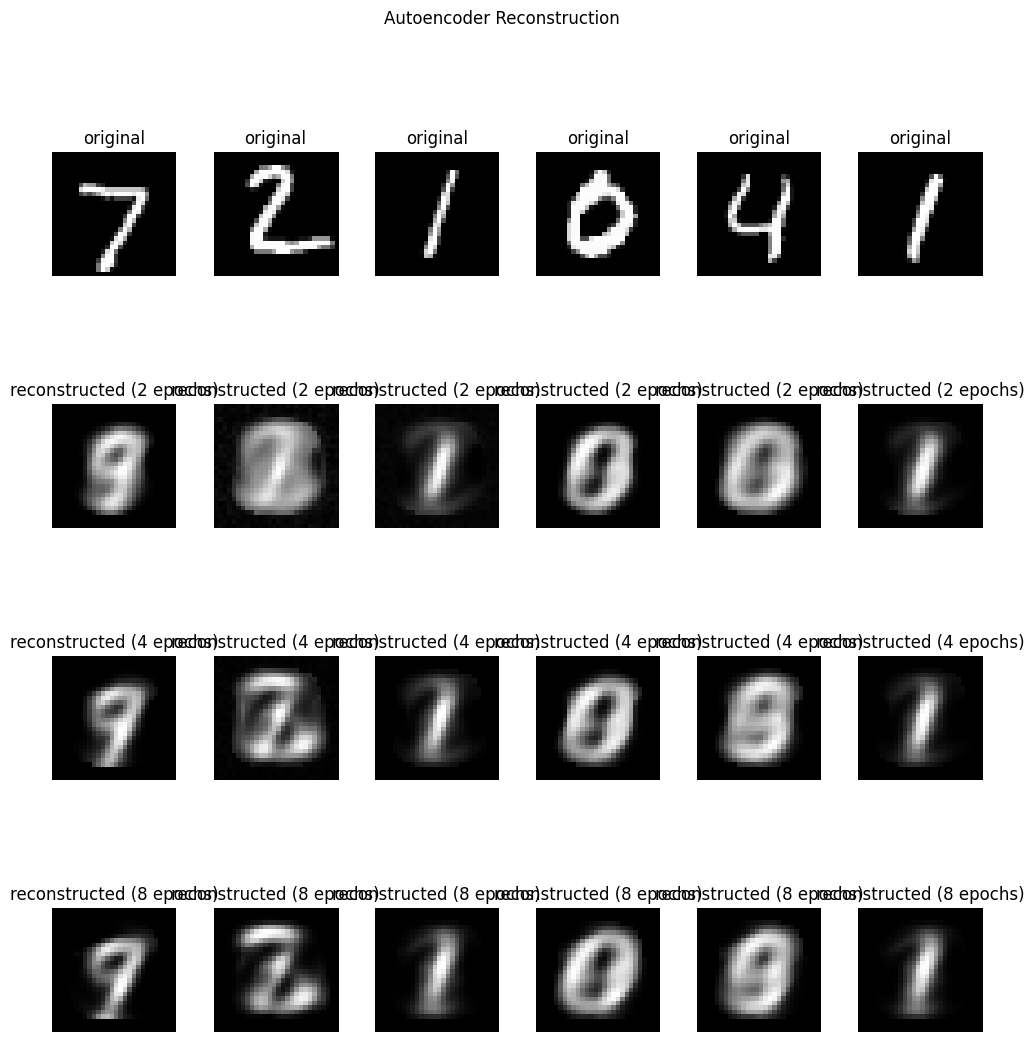

In [21]:
# Creating an instance of the Autoencoder model
simple_autoencoder = Autoencoder(latent_dimensions, input_data_shape)
simple_autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

# Compile and Fit Autoencoder for different epochs
epochs_list = [2, 4, 8]
n = 6  # Number of images to display per subplot

fig, axes = plt.subplots(len(epochs_list) + 1, n, figsize=(12, 12))

# Display original images in the first row
for j in range(n):
    axes[0, j].imshow(x_test[j], cmap='gray')
    axes[0, j].set_title("original")
    axes[0, j].axis('off')

for i, epochs in enumerate(epochs_list):
    print(f"Training with {epochs} epochs:")
    simple_autoencoder.fit(x_train, x_train,
                          epochs=epochs,
                          shuffle=True,
                          validation_data=(x_test, x_test))

    encoded_imgs = simple_autoencoder.encoder(x_test).numpy()
    decoded_imgs = simple_autoencoder.decoder(encoded_imgs).numpy()

    for j in range(n):
        # Display reconstruction
        axes[i + 1, j].imshow(decoded_imgs[j], cmap='gray')
        axes[i + 1, j].set_title(f"reconstructed ({epochs} epochs)")
        axes[i + 1, j].axis('off')

plt.suptitle("Autoencoder Reconstruction")
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()


هر یک از روش های گفته شده برای کاهش بعد در بخش اول و دوم با هم چه تفاوتی دارند؟ توضیح دهید

1. **Linear Kernel PCA:**
    - **Resource Usage:** Linear Kernel PCA has a computational complexity of \\
     O(n^3) \\
     a memory requirement of \\
     O(n^2) \\
     ,where *n* is the number of data points.
    - **Expected Accuracy:** Since it uses a linear kernel, it might not perform well on data that is not linearly separable.

2. **RBF Kernel PCA:**
    - **Resource Usage:** RBF Kernel PCA has the same computational complexity and memory requirement as Linear Kernel PCA. The difference is in the kernel function used.
    - **Expected Accuracy:** The RBF kernel can capture complex, non-linear relationships in the data, which can lead to higher accuracy than linear methods however, it didnt happen in our case.

3. **Polynomial Kernel PCA:**
    - **Resource Usage:** Polynomial Kernel PCA also has the same computational complexity and memory requirement as the other Kernel PCA methods.
    - **Expected Accuracy:** The Polynomial kernel can capture polynomial relationships in the data. The degree of the polynomial determines the complexity of the relationships it can capture.

4. **LDA (Linear Discriminant Analysis):**
    - **Resource Usage:** LDA has a lower computational complexity of \\
     O(n) \\
    and a memory requirement of \\
     O(n) \\
    ,making it more scalable to large datasets.
    - **Expected Accuracy:** LDA is a supervised method, so it can outperform PCA methods if the class labels are informative. However, it makes strong assumptions about the data (e.g., classes have the same covariance matrix), and if these assumptions are violated, the performance can suffer.

5. **Auto-encoder:**
    - **Resource Usage:** Training an auto-encoder involves backpropagation and can be computationally expensive.
    - **Expected Accuracy:** Auto-encoders are powerful and flexible due to their neural network architecture. They can capture complex, non-linear relationships in the data, potentially leading to high accuracy.

In conclusion, there is a trade-off between resource usage and expected accuracy, and the best method depends on the specific dataset and task.


## Section 2.1
# Clustering with K-means

*2.1 load & preprocess* $\newline$
*2.2 perform K-means from scratch* $\newline$
*2.3 validate different k's: Dunn Index, Davies–Bouldin Index, Silhouette index* 


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
# Read CSV file
data = pd.read_csv("iris.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
X = data.drop('species',axis=1)
y = data['species']
scaler = StandardScaler()
X = scaler.fit_transform(X)
#functions:
#1
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))
#2
def kmeans(X, k, max_iterations=100):
    # Initialize centroids randomly
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    
    for _ in range(max_iterations):
        # Assign each data point to the nearest centroid
        clusters = [[] for _ in range(k)]
        for x in X:
            distances = [euclidean_distance(x, c) for c in centroids]
            cluster_index = np.argmin(distances)
            clusters[cluster_index].append(x)
        
        # Update centroids
        new_centroids = []
        for cluster in clusters:
            new_centroids.append(np.mean(cluster, axis=0))
        
        if np.array_equal(centroids, new_centroids):
            break
        
        centroids = new_centroids
    
    return centroids, clusters

In [5]:
k3_centroids, k3_clusters = kmeans(X, 3)
k4_centroids, k4_clusters = kmeans(X, 4)
k5_centroids, k5_clusters = kmeans(X, 5)

print("K=3 Centroids:")
print(k3_centroids)
print("\nK=3 Clusters:")
for i, cluster in enumerate(k3_clusters):
    print(f"Cluster {i}: {len(cluster)} points")

print("\n\nK=4 Centroids:")
print(k4_centroids)
print("\nK=4 Clusters:")
for i, cluster in enumerate(k4_clusters):
    print(f"Cluster {i}: {len(cluster)} points")

print("\n\nK=5 Centroids:")
print(k5_centroids)
print("\nK=5 Clusters:")
for i, cluster in enumerate(k5_clusters):
    print(f"Cluster {i}: {len(cluster)} points")

K=3 Centroids:
[array([-0.80601877,  1.33577362, -1.28618375, -1.21026347]), array([ 0.57100359, -0.36600236,  0.69108416,  0.66322635]), array([-1.31926109, -0.34584225, -1.14482725, -1.1336954 ])]

K=3 Clusters:
Cluster 0: 32 points
Cluster 1: 96 points
Cluster 2: 22 points


K=4 Centroids:
[array([ 0.71958686, -0.07652442,  0.75482389,  0.83951097]), array([-0.1765589 , -1.00098311,  0.28616989,  0.20522305]), array([1.81347913, 0.21443341, 1.38449034, 1.20253943]), array([-1.01457897,  0.84230679, -1.30487835, -1.25512862])]

K=4 Clusters:
Cluster 0: 43 points
Cluster 1: 42 points
Cluster 2: 15 points
Cluster 3: 50 points


K=5 Centroids:
[array([-0.57445998,  1.97546931, -1.27128385, -1.20173037]), array([ 0.38167879, -0.38528594,  0.60874736,  0.56599114]), array([1.39733017, 0.24209538, 1.16081857, 1.21674456]), array([-1.16921537,  0.44416861, -1.31668183, -1.27389017]), array([-0.35279167, -1.33227742,  0.10262199,  0.01318541])]

K=5 Clusters:
Cluster 0: 13 points
Cluster 1: 

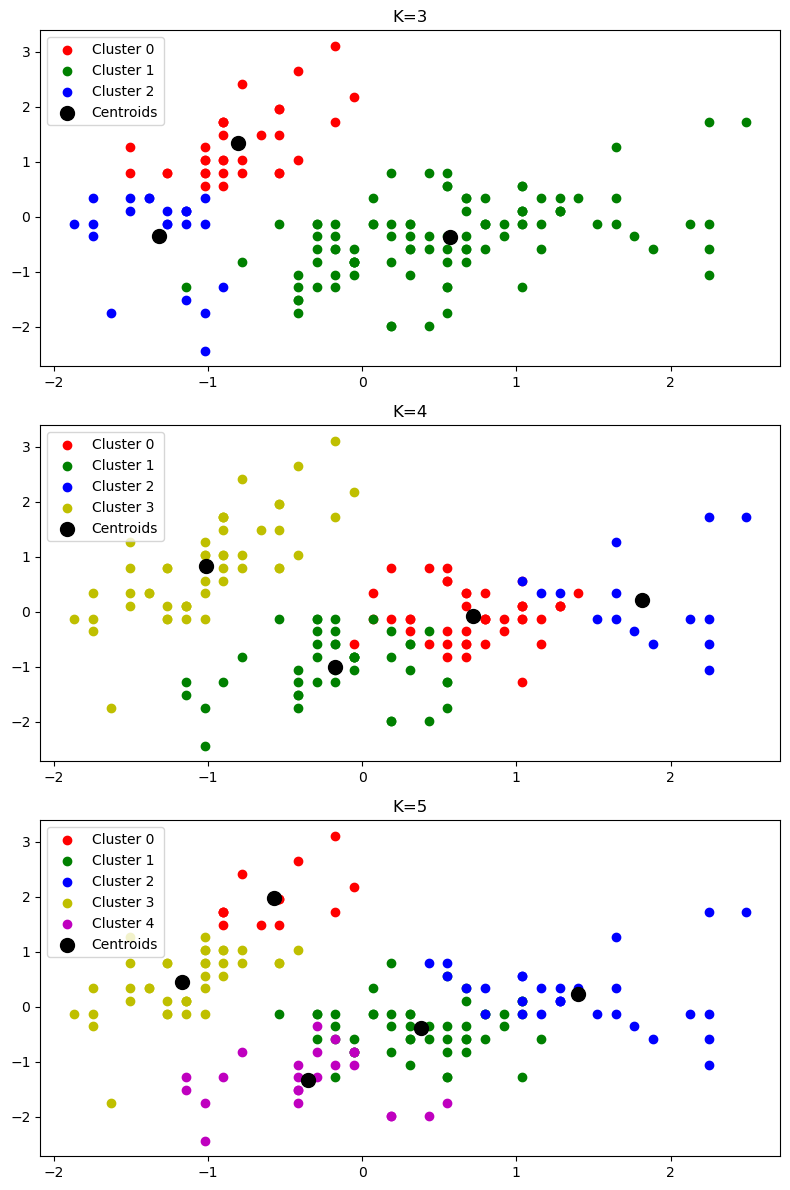

In [8]:
fig, axs = plt.subplots(3, 1, figsize=(8, 12))
colors = ['r', 'g', 'b', 'y', 'm']

# K=3
for i, cluster in enumerate(k3_clusters):
    cluster_points = np.array(cluster)
    axs[0].scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i}')
axs[0].scatter([centroid[0] for centroid in k3_centroids], [centroid[1] for centroid in k3_centroids], s=100, c='black', label='Centroids')
axs[0].set_title('K=3')
axs[0].legend()

# K=4
for i, cluster in enumerate(k4_clusters):
    cluster_points = np.array(cluster)
    axs[1].scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i}')
axs[1].scatter([centroid[0] for centroid in k4_centroids], [centroid[1] for centroid in k4_centroids], s=100, c='black', label='Centroids')
axs[1].set_title('K=4')
axs[1].legend()

# K=5
for i, cluster in enumerate(k5_clusters):
    cluster_points = np.array(cluster)
    axs[2].scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i}')
axs[2].scatter([centroid[0] for centroid in k5_centroids], [centroid[1] for centroid in k5_centroids], s=100, c='black', label='Centroids')
axs[2].set_title('K=5')
axs[2].legend()

plt.tight_layout()
plt.show()


In [9]:
from scipy.spatial.distance import pdist, squareform

def dunn_index(clusters):
    # Calculate intra-cluster distances
    intra_cluster_distances = [pdist(cluster) for cluster in clusters]
    max_intra_cluster_distance = max([dist.max() for dist in intra_cluster_distances])

    # Calculate inter-cluster distances
    centroids = [np.mean(cluster, axis=0) for cluster in clusters]
    inter_cluster_distances = squareform(pdist(centroids))
    np.fill_diagonal(inter_cluster_distances, np.inf)
    min_inter_cluster_distance = inter_cluster_distances.min()

    # Calculate Dunn index
    dunn_index = min_inter_cluster_distance / max_intra_cluster_distance

    return dunn_index

# Calculate Dunn Index for different k's
print("Dunn Index for K=3: ", dunn_index(k3_clusters))
print("Dunn Index for K=4: ", dunn_index(k4_clusters))
print("Dunn Index for K=5: ", dunn_index(k5_clusters))

Dunn Index for K=3:  0.36353691585450765
Dunn Index for K=4:  0.2650452579316269
Dunn Index for K=5:  0.46012841166149815


- **K=3**: The Dunn Index is **0.36353691585450765**. In the corresponding plot, the clusters appear distinct and moderately well-separated. This suggests that the clusters are reasonably compact and separated from each other.

- **K=4**: The Dunn Index drops to **0.2650452579316269**, which is lower than the value for K=3. This indicates that the separation between clusters has decreased compared to when K was 3. In the corresponding plot, the separation between some of the clusters is not as clear as in the K=3 case, which aligns with the lower Dunn Index.

- **K=5**: The Dunn Index increases significantly to **0.46012841166149815**, which is higher than the values for both K=3 and K=4. This suggests that the clusters are more compact and well-separated from each other when K=5. In the corresponding plot, the clusters appear more spread out than in the previous cases, which aligns with the higher Dunn Index.

In conclusion, according to the Dunn Index values, a clustering solution where K equals 5 might offer better cluster separation compared to solutions where K equals 3 or 4.

In [10]:
from sklearn.metrics import davies_bouldin_score

# Flatten the cluster lists and create labels
k3_labels = [i for i, cluster in enumerate(k3_clusters) for _ in cluster]
k4_labels = [i for i, cluster in enumerate(k4_clusters) for _ in cluster]
k5_labels = [i for i, cluster in enumerate(k5_clusters) for _ in cluster]

# Flatten the data points
X_flattened = [point for cluster in k3_clusters for point in cluster]

# Calculate Davies-Bouldin Index for different k's
dbi_k3 = davies_bouldin_score(X_flattened, k3_labels)
dbi_k4 = davies_bouldin_score(X_flattened, k4_labels)
dbi_k5 = davies_bouldin_score(X_flattened, k5_labels)

print("Davies-Bouldin Index for K=3: ", dbi_k3)
print("Davies-Bouldin Index for K=4: ", dbi_k4)
print("Davies-Bouldin Index for K=5: ", dbi_k5)

Davies-Bouldin Index for K=3:  0.7868006762339901
Davies-Bouldin Index for K=4:  3.3020179353362415
Davies-Bouldin Index for K=5:  1.8504626690507409


- **K=3**: The Davies-Bouldin Index is **0.7868006762339901**. In the corresponding plot, the clusters appear distinct and moderately well-separated. This suggests that the clusters are reasonably compact and separated from each other.

- **K=4**: The Davies-Bouldin Index is significantly higher at **3.3020179353362415**, indicating that the separation between clusters has decreased compared to when K was 3. In the corresponding plot, the separation between some of the clusters is not as clear as in the K=3 case, which aligns with the higher Davies-Bouldin Index.

- **K=5**: The Davies-Bouldin Index is **1.8504626690507409**, which is lower than the value for K=4 but still higher than the value for K=3. This suggests that the clusters are more compact and well-separated from each other when K=5 compared to K=4, but not as well-separated as when K=3. In the corresponding plot, the clusters appear more spread out than in the case of K=4 but less so than in the case of K=3.

In conclusion, according to the Davies-Bouldin Index values, a clustering solution where K equals 3 might offer better cluster separation compared to solutions where K equals 4 or 5.

In [11]:
from sklearn.metrics import silhouette_score

# Flatten the cluster lists and create labels
k3_labels = [i for i, cluster in enumerate(k3_clusters) for _ in cluster]
k4_labels = [i for i, cluster in enumerate(k4_clusters) for _ in cluster]
k5_labels = [i for i, cluster in enumerate(k5_clusters) for _ in cluster]

# Flatten the data points
X_flattened = [point for cluster in k3_clusters for point in cluster]

# Calculate silhouette score for different k's
sil_k3 = silhouette_score(X_flattened, k3_labels)
sil_k4 = silhouette_score(X_flattened, k4_labels)
sil_k5 = silhouette_score(X_flattened, k5_labels)

print("Silhouette Score for K=3: ", sil_k3)
print("Silhouette Score for K=4: ", sil_k4)
print("Silhouette Score for K=5: ", sil_k5)

Silhouette Score for K=3:  0.4787241921049546
Silhouette Score for K=4:  0.02972638021003268
Silhouette Score for K=5:  -0.0034896843124942833


- **K=3**: The silhouette score is **0.4787241921049546**, which is relatively high. This suggests that the clusters are reasonably compact and separated from each other. In the corresponding plot, the clusters appear distinct and moderately well-separated, which aligns with the high silhouette score.

- **K=4**: The silhouette score drops significantly to **0.02972638021003268**, indicating that the separation between clusters has decreased compared to when K was 3. In the corresponding plot, the separation between some of the clusters is not as clear as in the K=3 case, which aligns with the lower silhouette score.

- **K=5**: The silhouette score is negative (**-0.0034896843124942833**), suggesting that some points might be incorrectly assigned to their clusters. In the corresponding plot, the clusters appear more spread out and less distinct than in the previous cases, which aligns with the negative silhouette score.

In conclusion, according to the silhouette scores, a clustering solution where K equals 3 might offer better cluster separation compared to solutions where K equals 4 or 5.

## Section 2.2
# Clustering with GMM

*2.1 load & preprocess* $\newline$
*2.2 perform GMM from scratch* $\newline$
*2.3 plot diffrent iterations for k=3* 


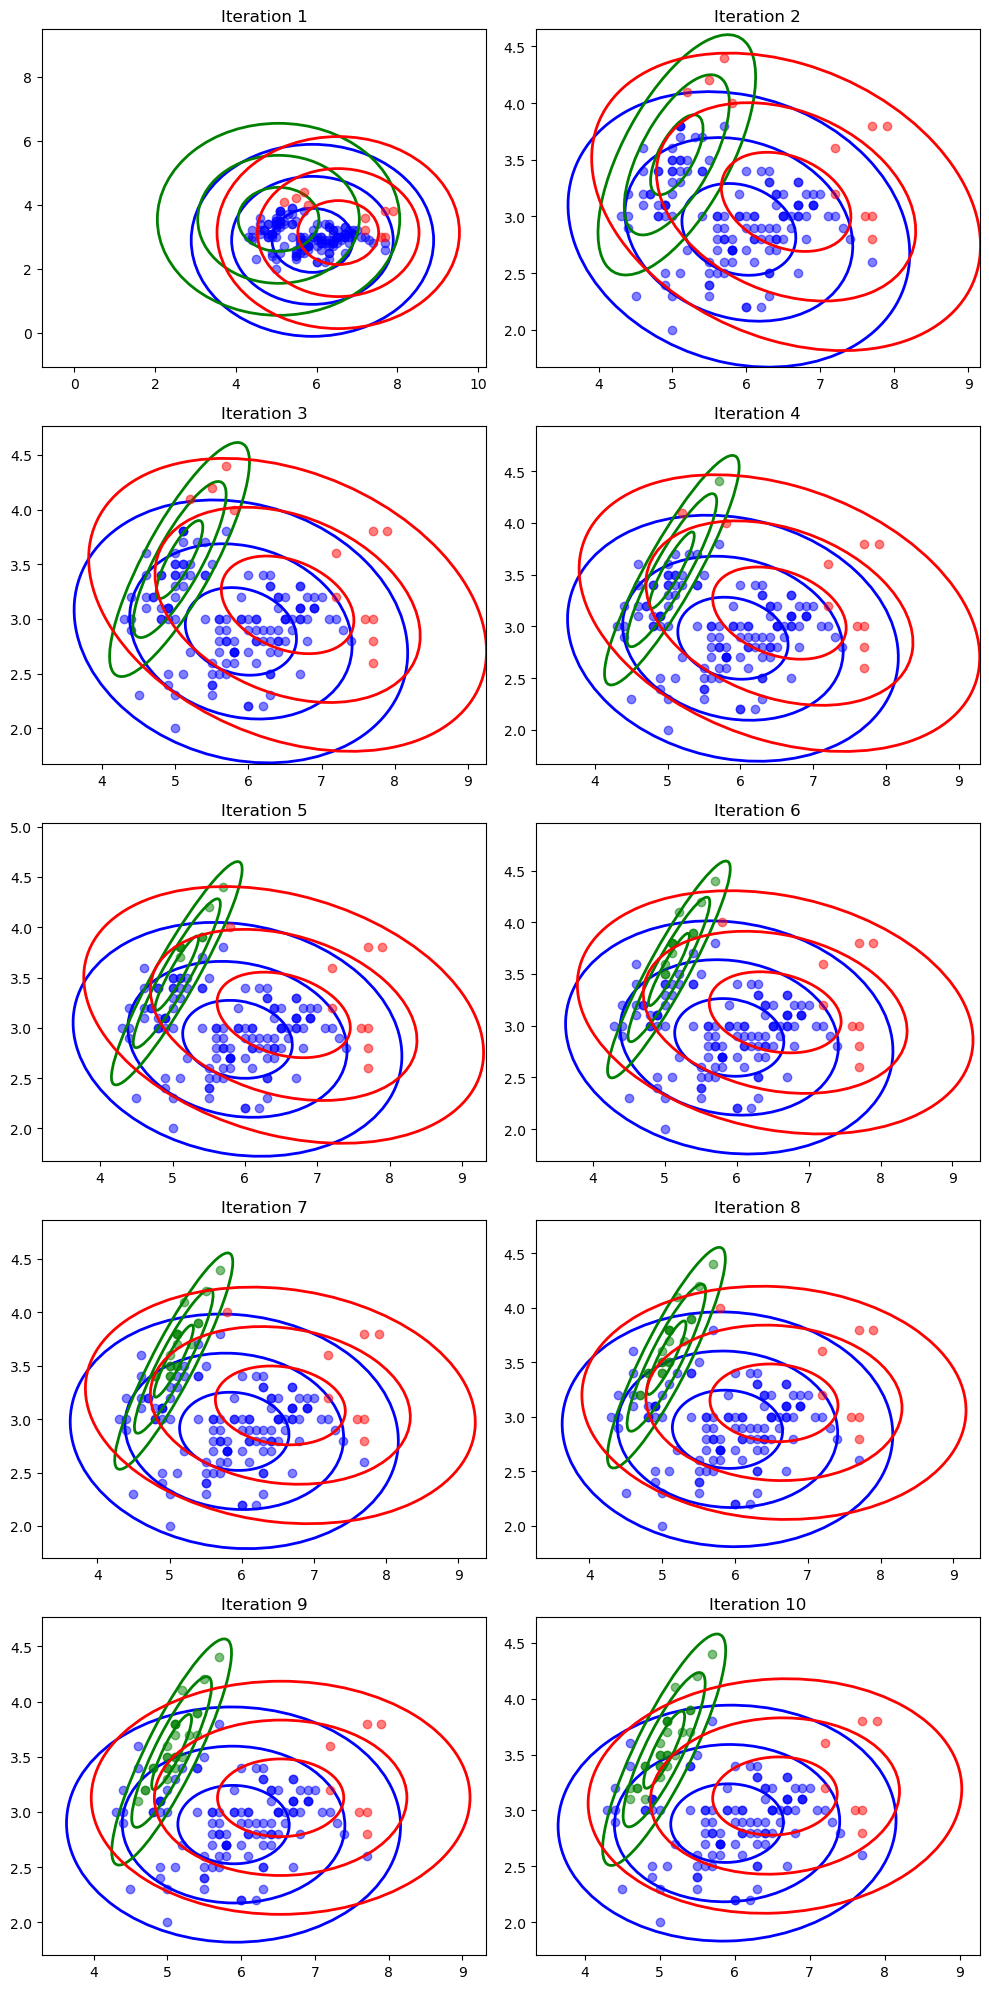

In [28]:
import numpy as np
import pandas as pd
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# Load the iris dataset
iris = pd.read_csv('iris.csv')
X = iris[['sepal_length', 'sepal_width']].values  # we only take the first two features for visualization

# Initialize parameters
k = 3
weights = np.ones((k)) / k
means = np.random.choice(X.flatten(), (k,X.shape[1]))
cov = np.array([np.eye(X.shape[1])]*k)

# Define colors for each cluster
colors = ['blue', 'green', 'red']

def plot_gmm(X, b, means, cov, ax):
    for i in range(k):
        # Plot data points for this cluster
        ax.scatter(X[b[:,i] > 0.5, 0], X[b[:,i] > 0.5, 1], c=colors[i], alpha=0.5)

        # Plot Gaussian distribution as an ellipse
        eigvals, eigvecs = np.linalg.eigh(cov[i])
        theta = np.degrees(np.arctan2(*eigvecs[:, 0][::-1]))
        for j in range(1, 4):
            width, height = 2 * j * np.sqrt(eigvals)
            ellipse = Ellipse(xy=means[i], width=width, height=height, angle=theta, edgecolor=colors[i], lw=2, facecolor='none')
            ax.add_patch(ellipse)

fig, axs = plt.subplots(5, 2, figsize=(10, 20))

for step in range(10):
    ax = axs[step // 2, step % 2]

    # E-step
    likelihood = np.zeros((X.shape[0], k))
    for i in range(k):
        distribution = multivariate_normal(mean=means[i], cov=cov[i])
        likelihood[:,i] = distribution.pdf(X)

    b = likelihood * weights
    b = b / np.sum(b, axis=1, keepdims=True)

    plot_gmm(X, b, means, cov, ax)
    ax.set_title(f"Iteration {step+1}")

    # M-step
    for i in range(k):
        weights[i] = np.mean(b[:,i])
        means[i] = np.sum(b[:,i].reshape(-1,1) * X, axis=0) / np.sum(b[:,i])
        cov[i] = np.dot((b[:,i].reshape(-1,1)*(X-means[i])).T, (X-means[i])) / np.sum(b[:,i])

plt.tight_layout()
plt.show()


**K-means:**
- **Strengths:**
    * **Simplicity:** K-means is simple to understand and implement.
    * **Efficiency:** It is computationally efficient, especially with a large number of variables.
    * **Scalability:** K-means can scale to large datasets.
- **Limitations:**
    * **Assumptions:** K-means assumes clusters of similar size, and that features within clusters are independent and have the same variance (isotropic).
    * **Initialization sensitivity:** The final results of K-means can be significantly influenced by the initial starting conditions (initial cluster centers).
    * **Number of clusters:** The number of clusters (K) needs to be set in advance, which is not always feasible.
- **Suitability for Iris dataset:** K-means can be a good starting point for the Iris dataset due to its simplicity and efficiency. However, it may not capture the complexity of the data if the clusters have different sizes or shapes.

**Gaussian Mixture Model (GMM):**
- **Strengths:**
    * **Flexibility:** GMM is more flexible than K-means as it allows for elliptical, rather than spherical, clusters. It can accommodate clusters of different sizes and correlation structures within features.
    * **Soft assignment:** GMM provides a soft assignment of points to clusters, giving the probability of each point belonging to each cluster.
- **Limitations:**
    * **Complexity:** GMM is more complex and computationally intensive than K-means.
    * **Initialization sensitivity:** Like K-means, GMM can be sensitive to the initialization of clusters.
    * **Number of components:** The number of Gaussian components needs to be set in advance, similar to K in K-means.
- **Suitability for Iris dataset:** GMM could be a good fit for the Iris dataset if the clusters in the data are not spherical or have different sizes. The soft assignment can also provide more nuanced information about the structure of the data.

For the Iris dataset, both methods could be suitable, but GMM might provide more flexibility and nuanced information if the assumptions of K-means are not met.